
## ARIMA and Seasonal ARIMA
#### Autoregressive Integrated Moving Averages
#### The general process for ARIMA models is the following:

#####  - Visualize the Time Series Data
#####  - Make the time series data stationary
#####  - Plot the Correlation and AutoCorrelation Charts
#####  - Construct the ARIMA Model or Seasonal ARIMA based on the data
#####  - Use the model to make predictions

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('resources2/superstore_topcountries.csv')

In [3]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Country,Region,Market,...,Quantity,Discount,Profit,Shipping Cost,Order Priority,Days to Ship,Returned,Profit Margin Percentage,Returned $ Amount,Orders per Country
0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,...,2,0.0,62.15,40.77,High,2,0.0,27.998018,0.0,9994
1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,...,9,0.1,-288.77,923.63,Critical,2,0.0,-7.784817,0.0,2837
2,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific,...,9,0.1,919.97,915.49,Medium,1,0.0,17.776614,0.0,2837
3,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,Home Office,Berlin,Berlin,Germany,Western Europe,Europe,...,5,0.1,-96.54,910.16,Medium,2,0.0,-3.337586,0.0,2063
4,IN-2014-JM156557-41818,2014-06-28,2014-07-01,Second Class,Corporate,Sydney,New South Wales,Australia,Oceania,Asia Pacific,...,5,0.1,763.28,897.35,Critical,3,0.0,26.663127,0.0,2837


In [4]:
# Keep only relevant columns for this analysis
df.drop(df.columns.difference(['Order Date', 'Sales']), 1, inplace=True)
df = df.reset_index(drop=True)
df.head()

/Users/forrestcasey/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Order Date,Sales
0,2014-11-11,221.98
1,2014-02-05,3709.40
2,2014-10-17,5175.17
3,2014-01-28,2892.51
4,2014-06-28,2862.68


In [5]:
# Check the number of unique values in each column
df.nunique()

Order Date     1412
Sales         17835
dtype: int64

In [7]:
# Convert Month into Datetime
df['Order Date']=pd.to_datetime(df['Order Date'])

In [8]:
df.dtypes

Order Date    datetime64[ns]
Sales                float64
dtype: object

In [9]:
df.set_index('Order Date',inplace=True)

#### Step 2: Visualize the Data

<AxesSubplot:xlabel='Order Date'>

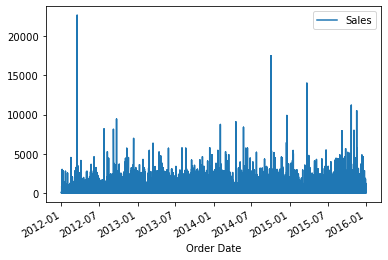

In [10]:
df.plot()

In [11]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [12]:
test_result=adfuller(df['Sales'])

In [13]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [14]:
adfuller_test(df['Sales'])

ADF Test Statistic : -7.3126749971776634
p-value : 1.2524264144837834e-10
#Lags Used : 54
Number of Observations Used : 38559
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
# Since the data is stationary we dont need to complete differencing

In [22]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

import warnings

warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)

from statsmodels.tsa.arima_model import ARIMA

In [19]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

/Users/forrestcasey/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/forrestcasey/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47161D+00    |proj g|=  4.81162D-03

At iterate    5    f=  7.46927D+00    |proj g|=  4.36895D-04

At iterate   10    f=  7.46927D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     19      1     0     0   8.882D-08   7.469D+00
  F =   7.4692689370606713     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [23]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                38613
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -288410.881
Method:                       css-mle   S.D. of innovations            424.231
Date:                Sat, 05 Mar 2022   AIC                         576829.763
Time:                        13:58:41   BIC                         576864.008
Sample:                             1   HQIC                        576840.621
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0494      0.017     -2.878      0.004      -0.083      -0.016
ar.L1.D.Sales     0.0283      0.005      5.525      0.000       0.018       0.038
ma.L1.D.Sales    -0.9923      0.001  -1658.159      0.000      -0.993      -0.991
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           35.3090           +0.0000j           35.3090            0.0000
MA.1            1.0077           +0.0000j            1.0077            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Order Date'>

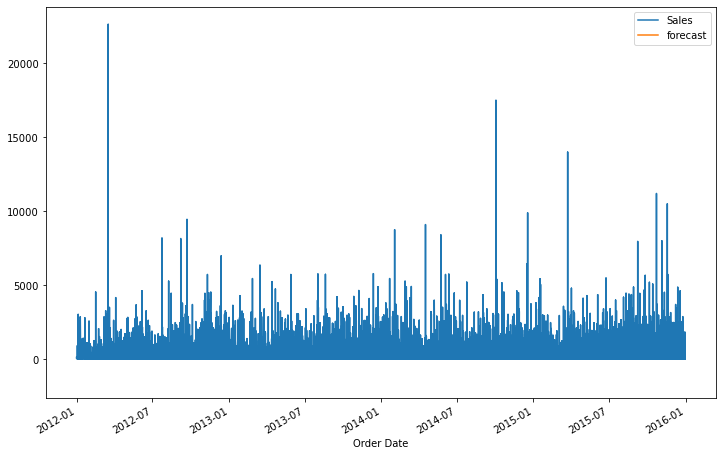

In [24]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [25]:
import statsmodels.api as sm

In [48]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1))
results=model.fit()

/Users/forrestcasey/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/forrestcasey/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/Users/forrestcasey/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/forrestcasey/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date in

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.53096D+00    |proj g|=  1.02483D-01

At iterate    5    f=  7.48542D+00    |proj g|=  1.07442D-02

At iterate   10    f=  7.47816D+00    |proj g|=  5.71228D-04

At iterate   15    f=  7.47477D+00    |proj g|=  2.58432D-03

At iterate   20    f=  7.46922D+00    |proj g|=  1.63757D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     26      1     0     0   2.726D-06   7.469D+00
  F =   7.4692195608345280     

CONVERG

/Users/forrestcasey/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


<AxesSubplot:xlabel='Order Date'>

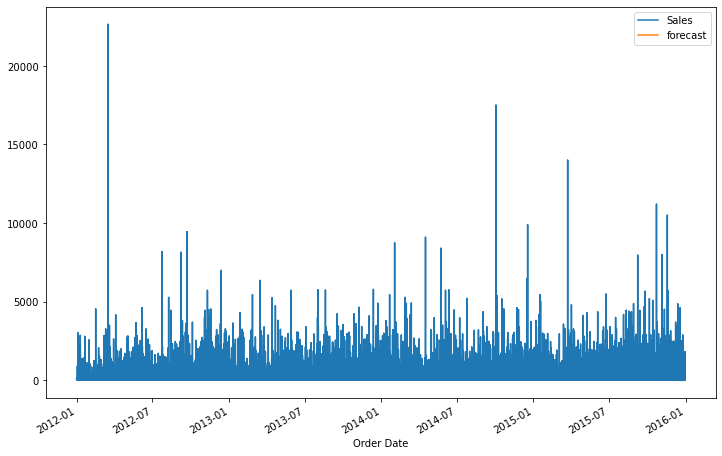

In [50]:
df['forecast']=results.predict(start = 38613, end = 90000,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [43]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [44]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [45]:
future_datest_df.tail()

,Sales,forecast
2014-12-22,NaN,NaN
2015-01-22,NaN,NaN
2015-02-22,NaN,NaN
2015-03-22,NaN,NaN
2015-04-22,NaN,NaN


In [46]:
future_df=pd.concat([df,future_datest_df])

/Users/forrestcasey/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


<AxesSubplot:>

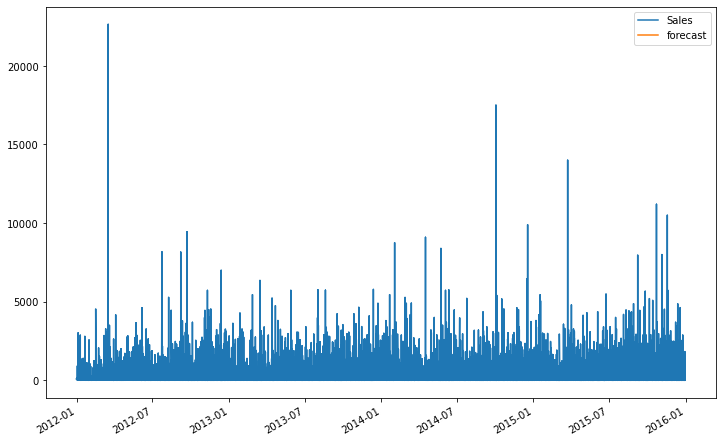

In [47]:
future_df['forecast'] = results.predict(start = 38613, end = 40000, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 